In [1]:
import numpy as np
import matplotlib.pyplot as plt
import finesse
from finesse.analysis.actions import RunLocks
from finesse import ligo
from LLOF3NoSqz import make_LLO

finesse.configure(plotting=True)

import warnings
warnings.filterwarnings('ignore')

In [8]:
LIGO = ligo.make_aligo(RF_AS_readout=False, verbose=True)

Lock('CARM_lock') REFL9_I -0.00010310899995708841
Lock('MICH_lock') POP45_Q 16.69737563119658
Lock('PRCL_lock') POP9_I -2.923409080736336
Lock('SRCL_lock') POP45_I -43.220106415336616
Lock('DARM_rf_lock') AS45_I -0.00339832744582408
Lock('DARM_dc_lock') AS_DC nan
Error Signal Residuals at Each Iteration (W):
                        DARM_rf_lock  
Iteration Number   0     -8.11e-19   
Error Signal Residuals at Each Iteration (W):
                        DARM_dc_lock  
Iteration Number   0     -1.13e-02   
Iteration Number   1     -7.25e-03   
Iteration Number   2     -4.23e-03   
Iteration Number   3     -2.31e-03   
Iteration Number   4     -1.21e-03   
Iteration Number   5     -6.24e-04   
Iteration Number   6     -3.17e-04   
Iteration Number   7     -1.60e-04   
Iteration Number   8     -8.07e-05   
Iteration Number   9     -4.06e-05   
Iteration Number   10    -2.04e-05   
Iteration Number   11    -1.02e-05   
Iteration Number   12    -5.15e-06   
Iteration Number   13    -2.58e-06

In [9]:
LLO = LIGO.deepcopy()
print(LLO.unparse())

regeneration of original KatScript for operations not implemented yet
regeneration of original KatScript for operations not implemented yet
regeneration of original KatScript for operations not implemented yet
regeneration of original KatScript for operations not implemented yet
regeneration of original KatScript for operations not implemented yet
regeneration of original KatScript for operations not implemented yet
regeneration of original KatScript for operations not implemented yet
regeneration of original KatScript for operations not implemented yet
regeneration of original KatScript for operations not implemented yet
regeneration of original KatScript for operations not implemented yet
regeneration of original KatScript for operations not implemented yet
regeneration of original KatScript for operations not implemented yet
regeneration of original KatScript for operations not implemented yet
regeneration of original KatScript for operations not implemented yet
regeneration of orig


# modulators for core interferometer sensing - Advanced LIGO, CQG, 2015
# http://iopscience.iop.org/article/10.1088/0264-9381/32/7/074001/meta#cqg507871s4-8
# 9MHz (CARM, PRC, SRC loops)
variable f1 9099471
variable f2 (5*&f1)
variable nsilica 1.45
variable Mloss 30u
###############################################################################
###   length definitions
###############################################################################
variable Larm 3994
variable LPR23 16.164  # distance between PR2 and PR3
variable LSR23 15.443  # distance between SR2 and SR3
variable LPR3BS 19.538 # distance between PR3 and BS
variable LSR3BS 19.366 # distance between SR3 and BS
variable lmich 5.342   # average length of MICH
variable lschnupp 0.08
variable lPRC ((3.5*299792458.0)/(2*&f1)) # T1000298 Eq2.1, N=3
variable lSRC ((17*299792458.0)/(2*&f2)) # T1000298 Eq2.2, M=3
###############################################################################
###   laser
#######################

In [10]:
removeElements = [
    "dbs OFI",
    "sq sqz db=6 angle=90.0",
    "obp OMC fc=0 bandwidth=1M filter_hom=[=0,0]",
    "pd Pas OMC.p2.o",
    "space sqz_p1__OFI_p2 portA=sqz.p1 portB=OFI.p2 auto_generated=true",
    "space SRMAR_p2__OFI_p1 portA=SRMAR.p2 portB=OFI.p1 auto_generated=true",
    "space OFI_p3__OMC_p1 portA=OFI.p3 portB=OMC.p1 auto_generated=true",
    "readout_dc AS    OMC.p2.o output_detectors=true",
    "lock DARM_dc_lock AS_DC DARM.DC -0.01 1e-6  disabled=false offset=20m",
    'readout_rf REFL9 PRMAR.p1.o f=&f1 phase=5.276114879012382 output_detectors=true',
    'readout_rf REFL18 PRMAR.p1.o f=(3*&f1)',
    'readout_rf REFL45 PRMAR.p1.o f=(5*&f1)',
    'readout_rf POP9  PR2.p3.o   f=&f1 phase=-169.13734272154758 output_detectors=true',
    'readout_rf POP45 PR2.p3.o   f=&f2 phase=177.83524272452797 output_detectors=true',
    'readout_rf AS45  SRMAR.p2.o f=&f2 phase=-6.146945800670171 output_detectors=true',
    'lock CARM_lock REFL9_I CARM.DC -0.00010310899995708841 1e-6',
    'lock MICH_lock POP45_Q MICH.DC 16.69737563119658 1e-6',
    'lock PRCL_lock POP9_I PRCL.DC -2.923409080736336 1e-6',
    'lock SRCL_lock POP45_I SRCL.DC -43.220106415336616 1e-6',
    'lock DARM_rf_lock AS45_I DARM.DC -0.00339832744582408 1e-6 disabled=true',
]

unparsed = LIGO.unparse()
for ele in removeElements:
    unparsed = unparsed.replace(ele, '')

print(unparsed)

regeneration of original KatScript for operations not implemented yet
regeneration of original KatScript for operations not implemented yet
regeneration of original KatScript for operations not implemented yet
regeneration of original KatScript for operations not implemented yet
regeneration of original KatScript for operations not implemented yet
regeneration of original KatScript for operations not implemented yet
regeneration of original KatScript for operations not implemented yet
regeneration of original KatScript for operations not implemented yet
regeneration of original KatScript for operations not implemented yet
regeneration of original KatScript for operations not implemented yet
regeneration of original KatScript for operations not implemented yet
regeneration of original KatScript for operations not implemented yet
regeneration of original KatScript for operations not implemented yet
regeneration of original KatScript for operations not implemented yet
regeneration of orig


# modulators for core interferometer sensing - Advanced LIGO, CQG, 2015
# http://iopscience.iop.org/article/10.1088/0264-9381/32/7/074001/meta#cqg507871s4-8
# 9MHz (CARM, PRC, SRC loops)
variable f1 9099471
variable f2 (5*&f1)
variable nsilica 1.45
variable Mloss 30u
###############################################################################
###   length definitions
###############################################################################
variable Larm 3994
variable LPR23 16.164  # distance between PR2 and PR3
variable LSR23 15.443  # distance between SR2 and SR3
variable LPR3BS 19.538 # distance between PR3 and BS
variable LSR3BS 19.366 # distance between SR3 and BS
variable lmich 5.342   # average length of MICH
variable lschnupp 0.08
variable lPRC ((3.5*299792458.0)/(2*&f1)) # T1000298 Eq2.1, N=3
variable lSRC ((17*299792458.0)/(2*&f2)) # T1000298 Eq2.2, M=3
###############################################################################
###   laser
#######################

In [11]:
LLO = finesse.Model()
LLO.parse(unparsed)
LLO.parse(
    """
    s sSRM_FI SRMAR.p2 FI2.p1 0.9078
   
    ###########################################################################

    # (Loctions and angles based on the solid work file D1000342-v14 give ~5% 
    # mismatch. Thus lom1, lom3omc have been adjusted to get ~99.7% overlap at the OMC)

    # Distance SRM --> Faraday Isolator (FI)


    # Directional beam splitter (ideal Faraday Isolator with 4 ports)
    # ----------------------------------------------------------------
    # Description of node connections, inputNode --> outputNode
    # --
    # nFI2a (SRM)    --> nFI2c (OMC)
    # nFI2b (SQZ)    --> nFI2a (SRM)
    # nFI2c (OMC)    --> nFI2d (Unused)
    # nFI2d (Unused) --> nFI2b (SQZ)

    dbs FI2

    # Distance FI2 --> OM1  
    s sFI_OM1 FI2.p3 OM1.p1 2.51281

    # OM1
    bs OM1 T=800u L=&Mloss phi=0 alpha=2.251 Rc=4.6# T is set for high power; Loss is a guess

    # Distance OM1 --> OM2
    s sOM1_OM2 OM1.p2 OM2.p1 1.395 

    # OM2
    bs OM2 T=10u L=&Mloss phi=0 alpha=4.399 Rc=1.7058 # T is a guess

    # Distance OM2 --> OM3

    s sOM2_OM3 OM2.p2 OM3.p1 0.64
    bs OM3 T=10u L=&Mloss phi=0 alpha=30.037 # T is a guess

    # Distance OM3 --> OMC input coupler IC
    s sOM3_OMC OM3.p2 OMC_IC.p1 0.31525 # By design should be ~0.31

    ###########################################################################
    ### FTend FI

    ### FTblock OMC
    ###########################################################################
    # OMC (as built parameters: D1300507-v1)

    # Input Coupler IC (flat mirror)
    bs OMC_IC T=0.0076 L=10u phi=0 alpha=2.7609

    # Distance from IC to OC  
    s lIC_OC OMC_IC.p3 OMC_OC.p1 0.2815

    # Output Coupler OC (flat mirror)
    bs OMC_OC T=0.0075 L=10u phi=0 alpha=4.004

    # Distance from OC to CM1
    s lOC_CM1 OMC_OC.p2 OMC_CM1.p1 0.2842

    # Curved Mirror CM1
    bs OMC_CM1 T=36u L=10u phi=0 alpha=4.004 Rc=2.57321
    
    # Distance from CM1 to CM2 
    s lCM1_CM2 OMC_CM1.p2 OMC_CM2.p1 0.2815

    # Curved Mirror CM2
    bs OMC_CM2 T=35.9u L=10u phi=0 alpha=4.004 Rc=2.57369

    # Distance from CM2 to IC
    s lCM2_IC OMC_CM2.p2 OMC_IC.p4 0.2842

    ###########################################################################
    ### FTend OMC
    cav cavOMC OMC_OC.p1.o

    ###########################################################################
    ### replace the elements that have been removed
    
    pd1 REFL9_I PRMAR.p1.o f=&f1 phase=11.0  # CARM_lock
    pd1 POP45_Q PR2.p3.o f=&f2 phase=283.0   # MICH_lock
    pd1 POP9_I PR2.p3.o f=&f1 phase=191.0  # PRCL_lock
    pd1 POP45_I PR2.p3.o   f=&f2 phase=14.0  # SRCL_lock
    pd1 AS45_I SRMAR.p2.o f=&f2 phase=0  # DARM_rf_lock
    
    
#    readout_rf REFL9 PRMAR.p1.o f=&f1 phase=11.0 output_detectors=true
#    readout_rf REFL18 PRMAR.p1.o f=(3*&f1) phase=0
#    readout_rf REFL45 PRMAR.p1.o f=(5*&f1) phase=0
#    readout_rf POP9  PR2.p3.o   f=&f1 phase=11.0 output_detectors=true
#    readout_rf POP45 PR2.p3.o   f=&f2 phase=103.0 output_detectors=true
#    readout_rf AS45  SRMAR.p2.o f=&f2 phase=0 output_detectors=true
    
#    lock CARM_lock REFL9_I CARM.DC -2.4e-06 0.071
#    lock MICH_lock POP45_Q MICH.DC 91.0 1.9e-05
#    lock PRCL_lock POP9_I PRCL.DC -16.0 2.1e-05
#    lock SRCL_lock POP45_I SRCL.DC 0.29 0.015
#    lock DARM_rf_lock AS45_I DARM.DC -0.005 1e-6

""")

LLO = make_LLO(LLO)

In [12]:
LLOQNLS = LLO.deepcopy()
# LLOQNLS.SRCL.DC = 90
LLOQNLS.parse("""
series(
    xaxis(CARM.DC, lin, -100, 100, 200, name='xaxis1'),
    xaxis(PRCL.DC, lin, -10, 10, 200, name='xaxis2'),
    xaxis(MICH2.DC, lin, -5, 5, 200, name='xaxis3'),
    xaxis(DARM.DC, lin, -1, 1, 200, name='xaxis4', relative=True),
    xaxis(SRCL.DC, lin, -100, 100, 200, name='xaxis5'),
)
""")

outLLO = LLOQNLS.run()

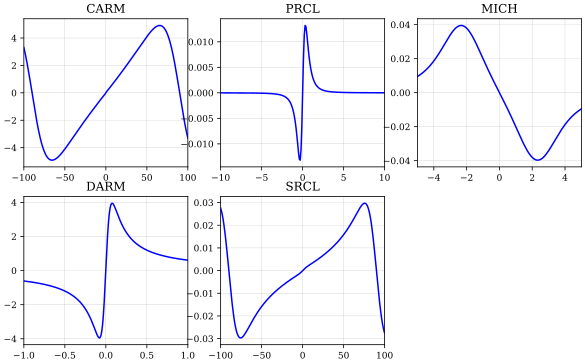

In [13]:
DOFs = ["CARM", "PRCL", "MICH", "DARM", "SRCL"]
Signals = ["REFL9_I", "POP9_I", "POP45_Q", "AS45_I", "POP45_I"]

fig, axes = plt.subplots(2, 3, figsize=(10, 6))

index = 0
for i in range(2):
    for j in range(3):
        if index > 4:
            axes[i, j].spines['top'].set_visible(False)
            axes[i, j].spines['right'].set_visible(False)
            axes[i, j].spines['bottom'].set_visible(False)
            axes[i, j].spines['left'].set_visible(False)
            axes[i, j].get_xaxis().set_ticks([])
            axes[i, j].get_yaxis().set_ticks([])
            break

        axes[i, j].set_title(DOFs[index])
        x = outLLO[f'xaxis{index+1}'].x[0]
        y = outLLO[f'xaxis{index+1}'][Signals[index]]
        
        axes[i, j].plot(x, y)  
        mmin = y.min()*(1+0.1)
        mmax = y.max()*(1+0.1)
    
        axes[i, j].set_ylim(mmin, mmax)
        index += 1

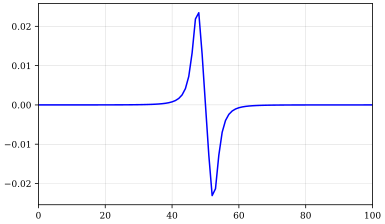

In [96]:
errorSignalsF2 = np.load("./F2 code/errorSignals.npy")
plt.plot(errorSignalsF2[4]);